In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from collections import Counter

In [17]:
df = pd.read_csv("Sports.csv")
df.head(10)

,Height,Weight,Sports
0,168,68,Cricket
1,170,69,Cricket
2,155,65,Football
3,160,65,Football
4,172,68,Cricket
5,161,64,Football
6,165,75,Wristler
7,166,76,Wristler
8,165,78,Wristler
9,155,67,Football


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  148 non-null    int64 
 1   Weight  148 non-null    int64 
 2   Sports  148 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


<Axes: xlabel='Height', ylabel='Weight'>

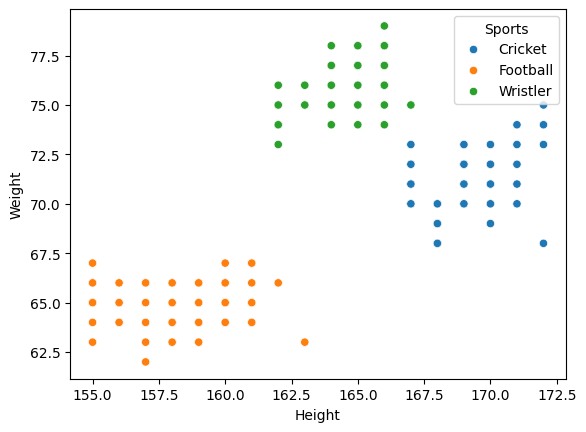

In [10]:
sns.scatterplot(data=df, x="Height", y="Weight", hue="Sports")

In [11]:
def KNN(data, new_sample, k):
    dis = []
    for sample in data.iterrows():      
        ecd = np.linalg.norm(np.array([sample[1].Height, sample[1].Weight]) - np.array(new_sample))
        dis.append([ecd, sample[1].Sports])
    dis = sorted(dis)[:k]
    votes = [sample[1] for sample in dis]
    print(dis)
    print(votes)

    result = Counter(votes).most_common()[0][0]
    print("The sample play: " + result)
    
    sns.scatterplot(data=df, x="Height", y="Weight", hue="Sports", s=150)
    plt.scatter(x=new_sample[0], y=new_sample[1], marker="*", color="red", s=150)

[[np.float64(2.0), 'Cricket'], [np.float64(2.0), 'Cricket'], [np.float64(2.0), 'Cricket']]
['Cricket', 'Cricket', 'Cricket']
The sample play: Cricket
[[np.float64(23.430749027719962), 'Cricket'], [np.float64(24.08318915758459), 'Cricket'], [np.float64(24.758836806279895), 'Cricket']]
['Cricket', 'Cricket', 'Cricket']
The sample play: Cricket
[[np.float64(0.0), 'Football'], [np.float64(0.0), 'Football'], [np.float64(0.0), 'Football']]
['Football', 'Football', 'Football']
The sample play: Football
[[np.float64(13.152946437965905), 'Cricket'], [np.float64(13.341664064126334), 'Cricket'], [np.float64(13.601470508735444), 'Cricket']]
['Cricket', 'Cricket', 'Cricket']
The sample play: Cricket
[[np.float64(8.0), 'Cricket'], [np.float64(8.06225774829855), 'Cricket'], [np.float64(8.246211251235321), 'Cricket']]
['Cricket', 'Cricket', 'Cricket']
The sample play: Cricket


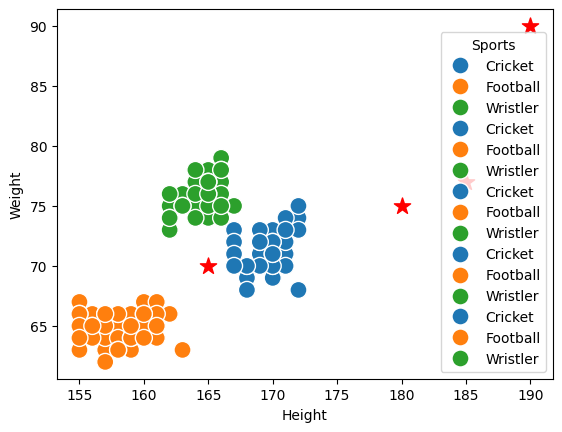

In [19]:
while True:
    h = input("Enter Height (or 'q' to quit): ")
    if h == 'q':
        break
    w = input("Enter Weight: ")
    KNN(data=df, new_sample=[int(h), int(w)], k=3)


In [ ]:
while True:
    height = input()
    if height == 'exit':
        break
    weight = input()
    KNN(data=df, new_sample=[int(height), int(weight)], k=3)